<a href="https://colab.research.google.com/github/Srinivashb12/Classifying-the-income-data-by-using-Machine-Learning-Algorithm-/blob/main/Classifying_Income_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      age     workclass  fnlwgt     education  educational-num  \
0      67       Private  366425     Doctorate               16   
1      17       Private  244602          12th                8   
2      31       Private  174201     Bachelors               13   
3      58     State-gov  110199       7th-8th                4   
4      25     State-gov  149248  Some-college               10   
...   ...           ...     ...           ...              ...   
1169   38     State-gov   34364       Masters               14   
1170   28     State-gov  175325       HS-grad                9   
1171   44  Self-emp-inc  121352  Some-college               10   
1172   60  Self-emp-inc   93272       7th-8th                4   
1173   34     State-gov  118551     Bachelors               13   

            occupation   race  gender  capital-gain  capital-loss  \
0      Exec-managerial  White    Male         99999             0   
1        Other-service  White    Male             0             0   


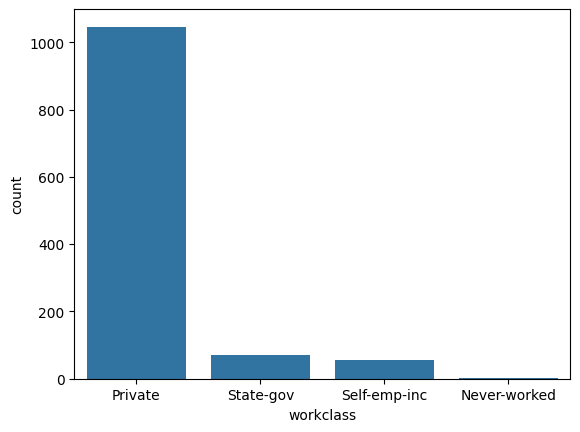

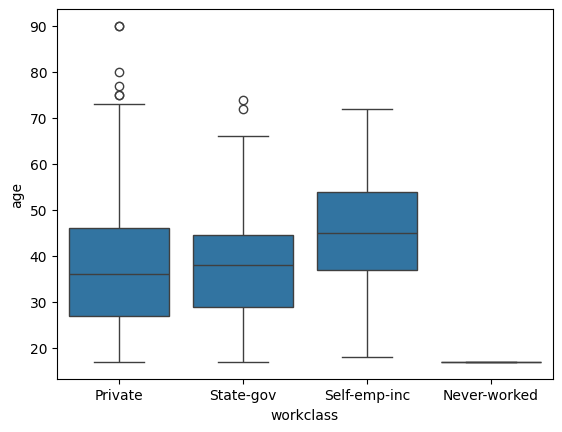

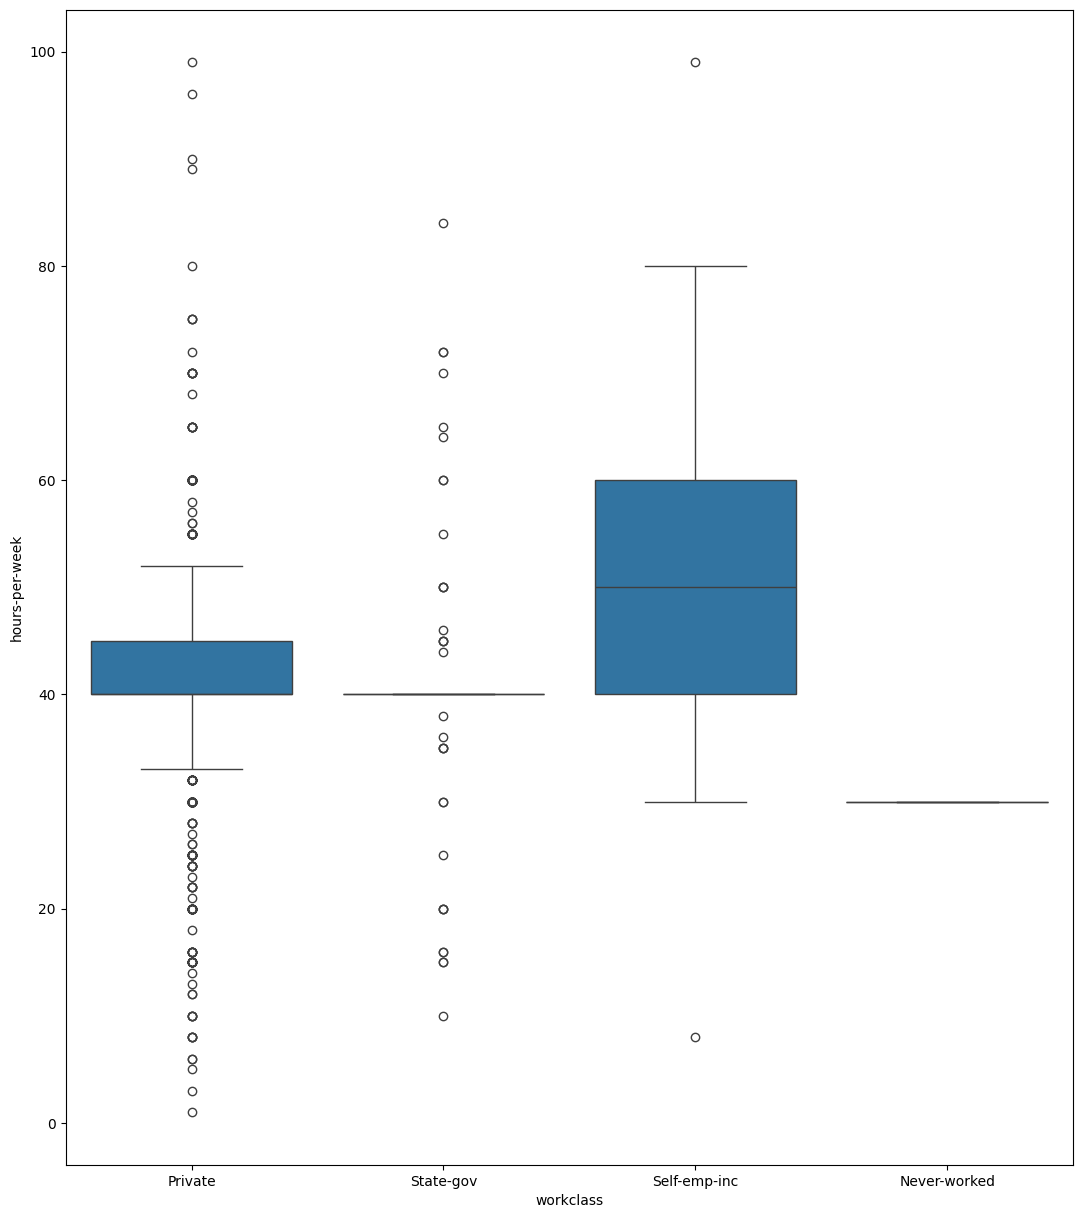

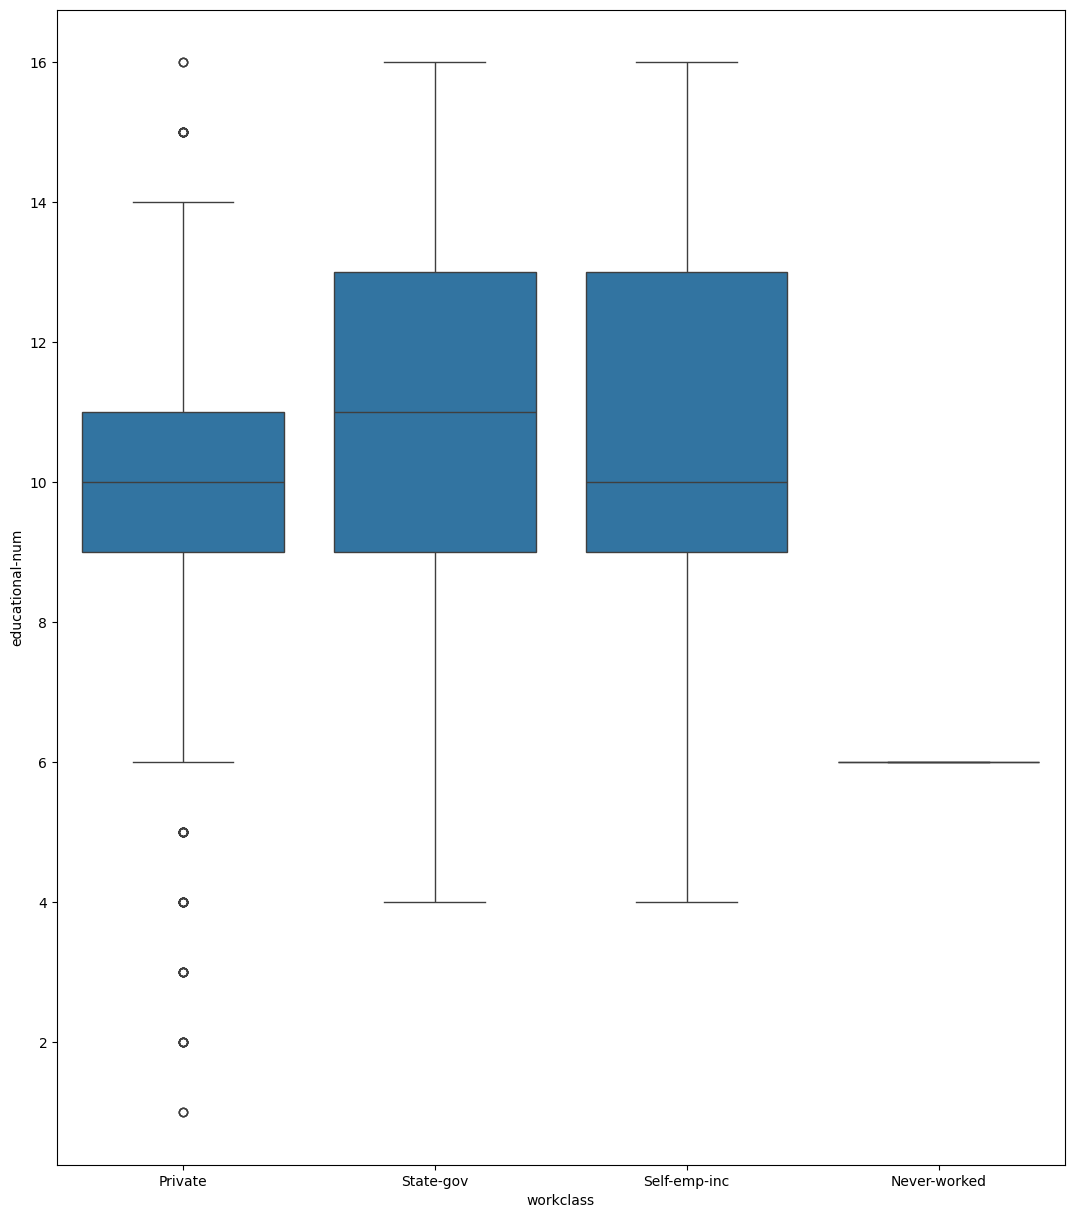

<Figure size 1300x1500 with 0 Axes>

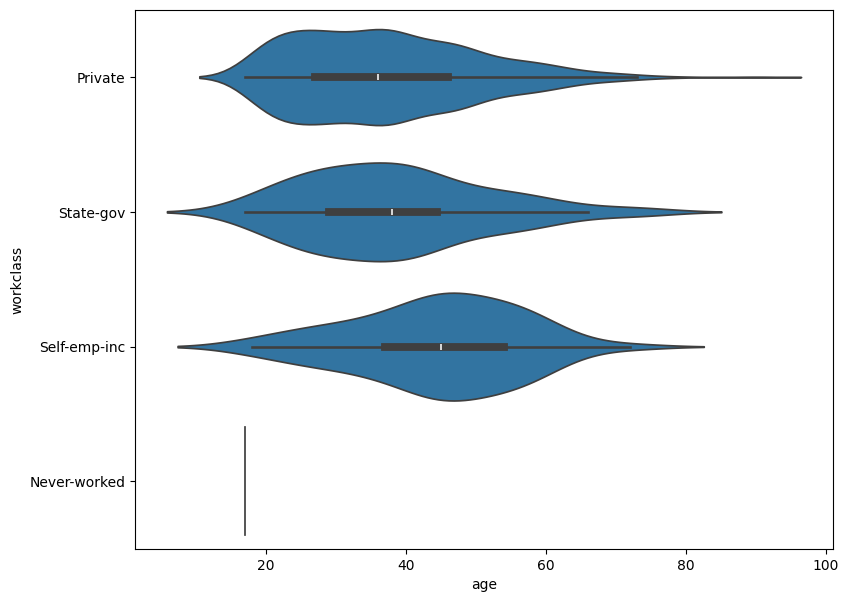

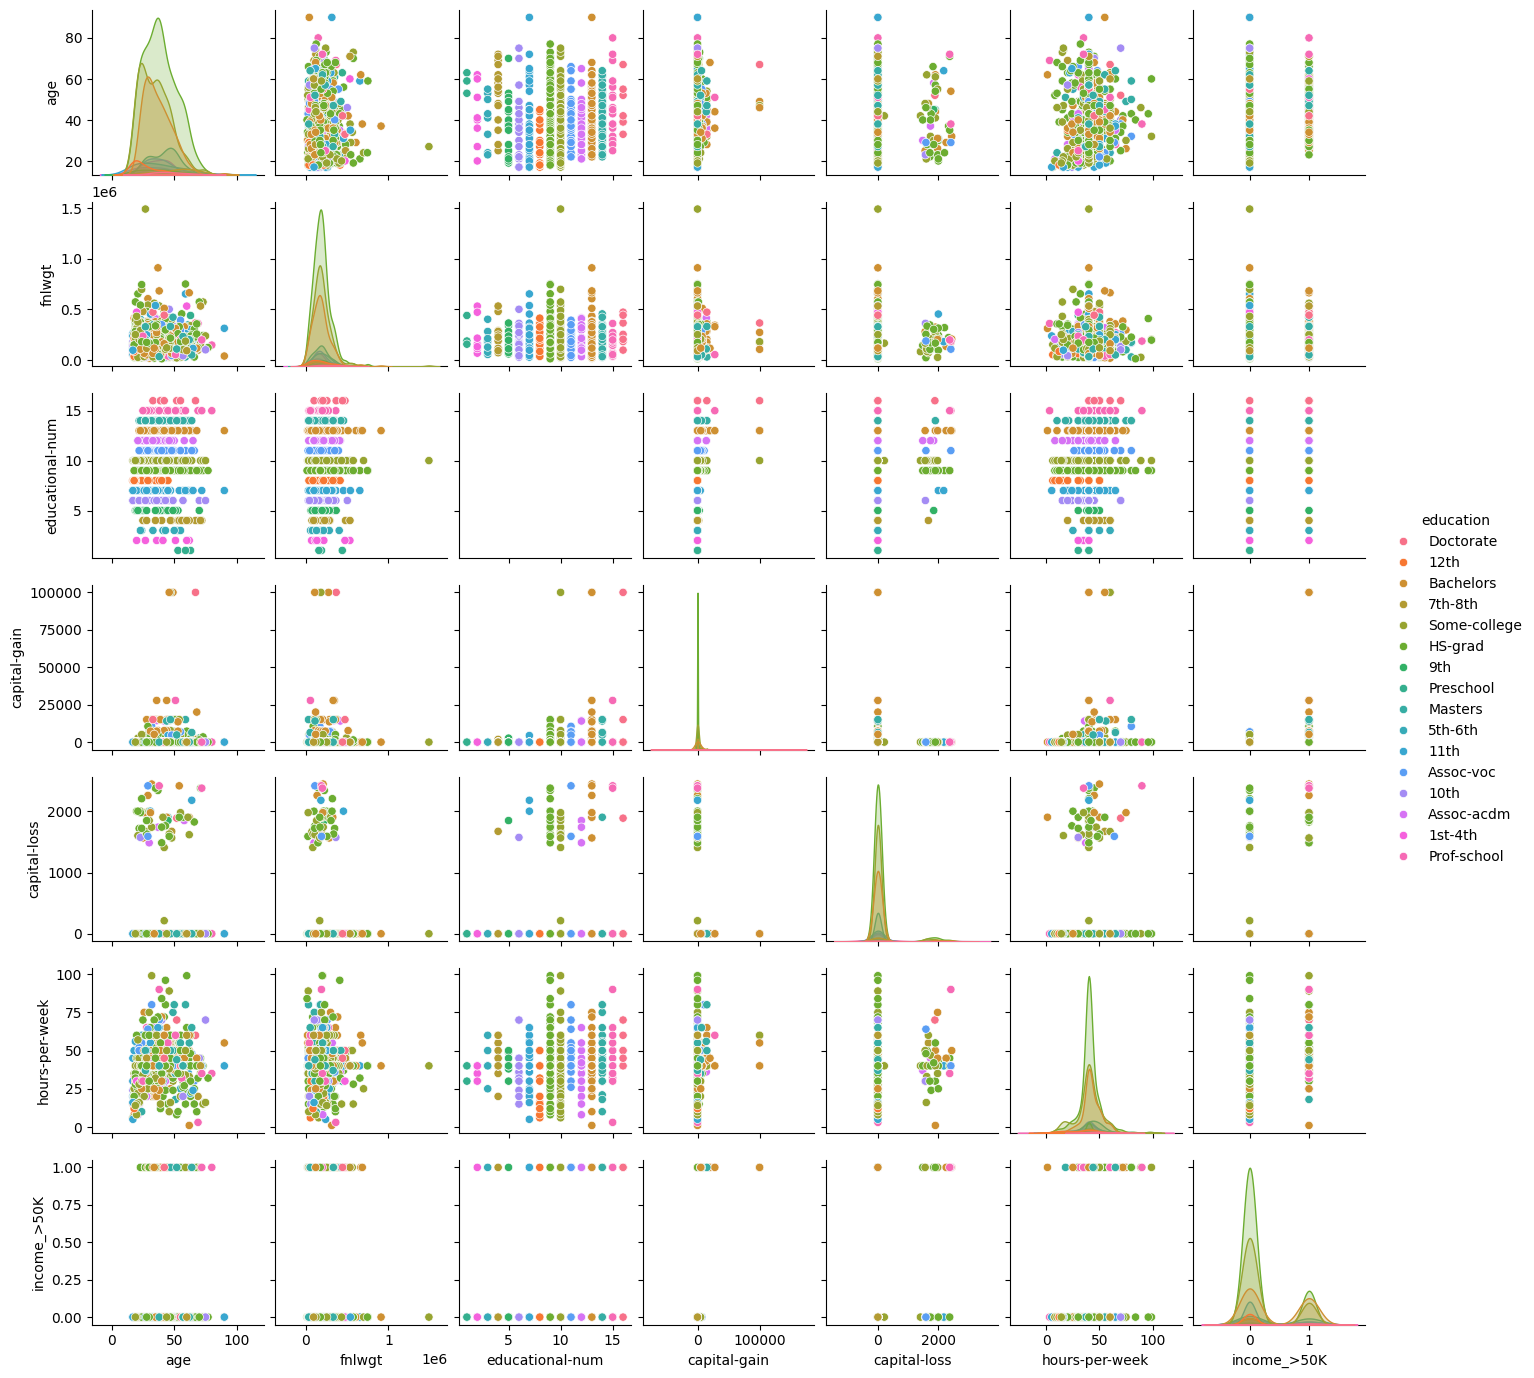

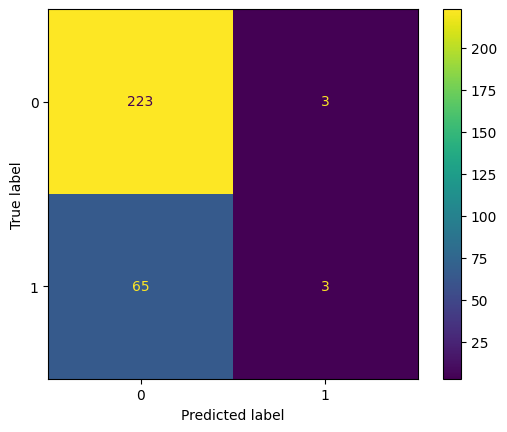

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87       226
           1       0.50      0.04      0.08        68

    accuracy                           0.77       294
   macro avg       0.64      0.52      0.47       294
weighted avg       0.71      0.77      0.69       294

Accuracy = 0.7687074829931972


In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 18:31:05 2023

@author: HP
"""
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#Reading dataset
data_set=pd.read_csv("/content/income_data.csv")
print(data_set)

#Ploting the countplot of workclass

sns.countplot(x='workclass', data=data_set,)
plt.show()

#Plotting the boxplot
def graph(y):

    sns.boxplot(x='workclass', y=y, data=data_set)
    plt.figure(figsize=(13, 15))

graph('age')
graph('hours-per-week')
graph('educational-num')

plt.show()

#violin plot
fig, ax= plt.subplots(figsize = (9, 7))
sns.violinplot(ax = ax , x = data_set["age"],y=data_set["workclass"])

#plotting pairplot
sns.pairplot(data_set.drop(['workclass'], axis = 1),
             hue = 'education', height=2)
plt.show()

#DecisionTree

x= data_set.iloc[:, 0:1].values
y= data_set.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#fitting K-NN classifier to the training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5, random_state=1)

classifier.fit(x_train, y_train)
#predicting the test set result
y_pred= classifier.predict(x_test)
result=classifier.score(x_test, y_test)

#creating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Classification Report:\n" ,classification_report(y_test, y_pred))

#print(cm)

acs=accuracy_score(y_test, y_pred)
print("Accuracy =" ,acs)